<a href="https://colab.research.google.com/github/linguo4/598sml-f22/blob/main/CS438HW2Q7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import random
import numpy as np

In [74]:
def seq_packet(num_packets):
  packets = []
  for i in range(num_packets):
    packets.append(random.randint(0, 10000))
  packets.sort()
  return packets

In [75]:
loops = 1000
max_size_AR = []
delays_AR = []
random.seed(42)
for A_rate in range(11):
  max_size = 0
  delays = []
  num_packets = A_rate * 1000
  for i in range(loops):
    packets = seq_packet(num_packets)
    idx = 0
    queue = []
    t = 0
    delay = 0
    
    while idx<num_packets or queue:
      while idx<num_packets and packets[idx] == t:
        queue.append(packets[idx])
        idx+=1
      if queue:
        R_time = queue.pop(0)
        delay+=(t-R_time)/10
      t+=1
      max_size = max(max_size, len(queue))
    if num_packets==0:
      delays.append(0)
    else:
      delays.append(delay/num_packets)
  max_size_AR.append(max_size)
  delays_AR.append(delays)

In [76]:
delay_avg = []
delay_25th = []
delay_75th = []
for delay in delays_AR:
  delay.sort()
  delay_avg.append(sum(delay)/loops)
  delay_25th.append((delay[int(loops *0.25)]+delay[int(loops *0.25)+1])/2)
  delay_75th.append((delay[int(loops *0.75)]+delay[int(loops *0.75)+1])/2)

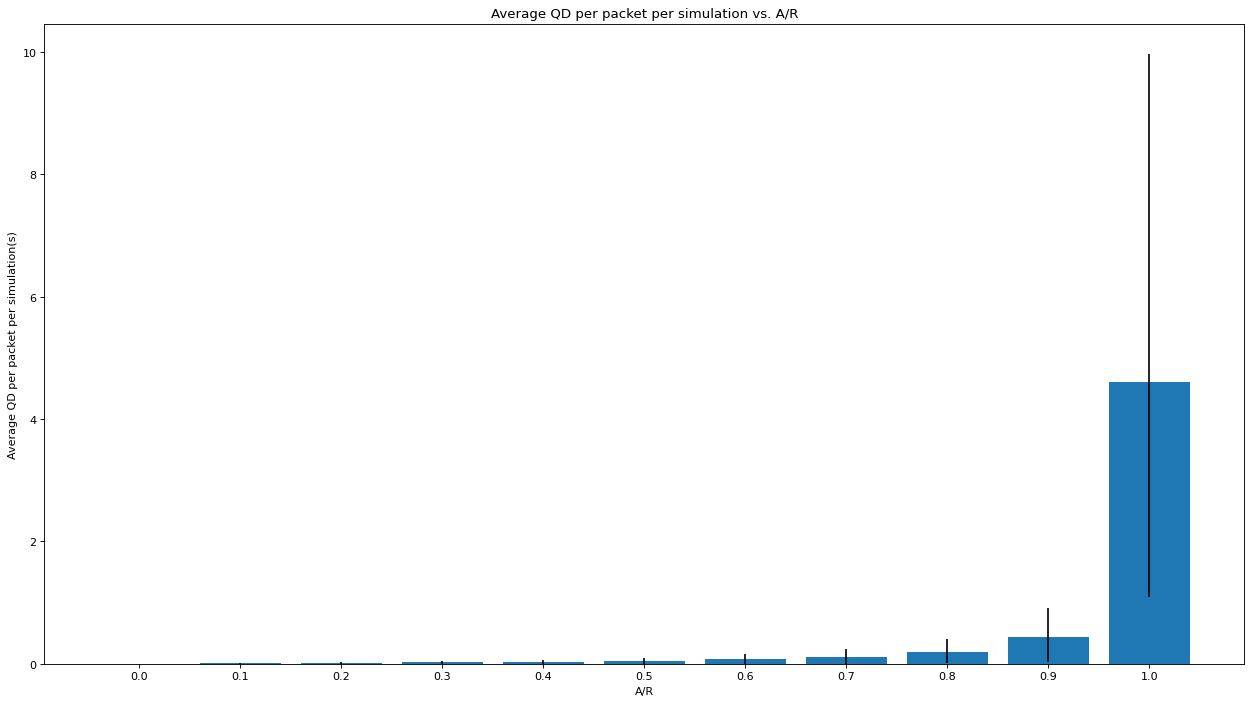

In [77]:
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(15, 8), dpi=80)
ax = fig1.add_axes([0, 0, 1, 1])
x = [str(i/10) for i in range(11)]
ax.bar(x, delay_avg, yerr = [delay_25th, delay_75th])
ax.set_title("Average QD per packet per simulation vs. A/R")
ax.set_xlabel("A/R")
ax.set_ylabel("Average QD per packet per simulation(s)")
plt.show()

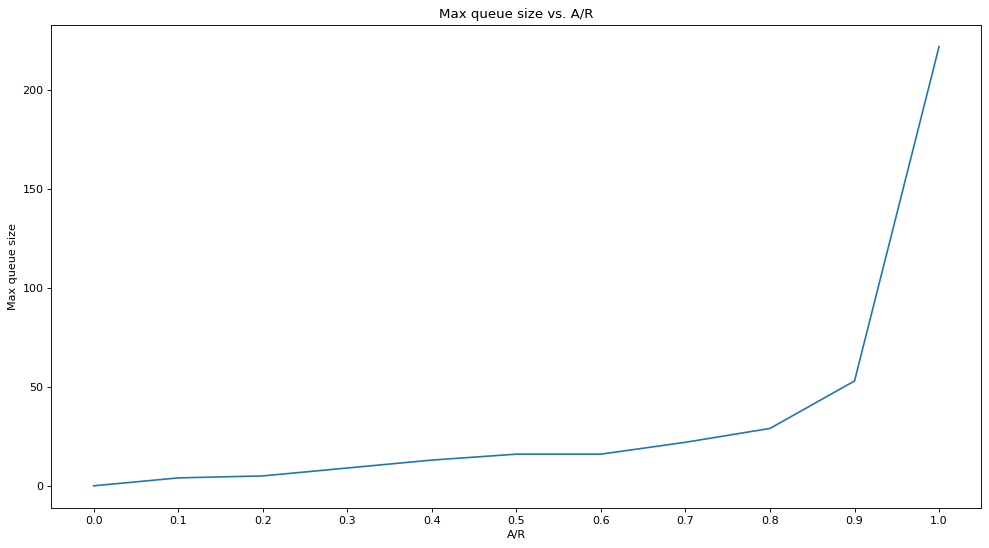

In [78]:
fig2 = plt.figure(figsize=(15, 8), dpi=80)
plt.plot(x, max_size_AR)
plt.ylabel("Max queue size")
plt.xlabel("A/R")
plt.title("Max queue size vs. A/R")
plt.show()